### Treść zadania

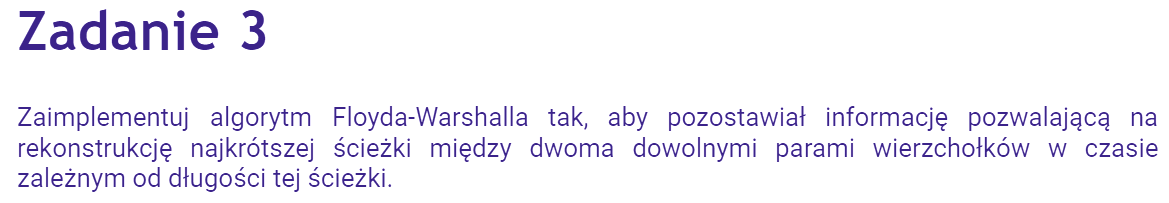

### Omówienie algorytmu

Idea jest taka, że w tablicy kwadratowej o rozmiarach $ n \times n $ będziemy zapamiętywać wierzchołek, który znajduje się na najkrótszej ścieżce prowadzącej z wierzchołka $ u $ do $ v $ (patrz sposób działanai algorytmu Floyda-Warshalla opisany w podlinkowanym niżej pliku). Następnie tę informację wykorzystamy do rekurencyjnego odtworzenia ścieżki, zauważając, że odtworzenie najkrótszej ścieżki między parą wierzchołków $ u $ i $ v $ jest równoznaczne rekurencyjnemu odtworzeniu najpierw ścieżki między wierzchołkiem $ u $ a wierzchołkiem $ w $, który leży na ścieżce z $ u $ do $ v $, a następnie odtworzeniu ścieżki z $ w $ do $ v $ i połączeniu tych ścieżek.

### Złożoność

###### Obliczeniowa:
$ O(n) $ - jeżeli chodzi o samo odtwarzanie ścieżki, bo o to chodzi głównie w tym zadaniu, gdzie $ n $ - liczba wierzchołków/krawędzi, tworzących ścieżkę.
###### Pamięciowa:
$ O(n) $ - jeżeli chodzi o samo odtwarzanie ścieżki bez wliczania zapisanej w 2-wymiarowej tablicy informacji o ścieżkach, to złożoność będzie zależna od długości ścieżki.

### Implementacja #1
#### (Ze sprawdzaniem ujemnych cykli - bez odtwarzania ścieżek, na których znajduje się ujemny cykl)

In [1]:
import copy


def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    # Create a copy of a graph as we have to have lengths
    # of edges stored at the beginning of an algorithm
    W = copy.deepcopy(G)
    
    # B[i][j] - a vetrex on the shortest path from i to j
    # for which a path has the lowest total weight (length)
    B = [[None] * n for _ in range(n)]
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]
                    B[i][j] = t
                    
    # Detect negative cycles (the same approach as in the
    # Bellman-Ford's algoritm)
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = -inf
                    B[i][j] = -1
                
    return W, B


def get_shortest_path(B: 'array of vertices between two vertices on a path', s: 'source', t: 'target'):
    # Check if we have a negative cycle (there is no shortest path)
    if B[s][t] < 0: return None
    
    path = []
    
    # Recursively restore a path
    def recur(i, j):
        if B[i][j] is None:
            return path.append(i)
        recur(i, B[i][j])
        recur(B[i][j], j)
    
    recur(s, t)
    
    return path

###### Kilka testów

##### Pomocnicze:

In [2]:
def directed_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[float('inf')] * n for _ in range(n)]  # infinity means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
    return G

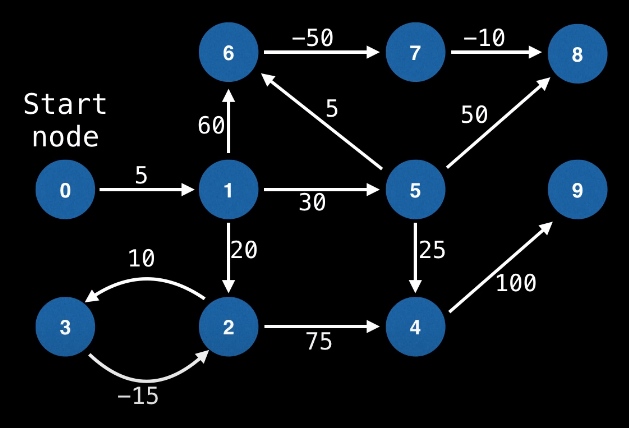

In [3]:
E = [(0, 1, 5), (1, 6, 60), (6, 7, -50), (7, 8, -10), (5, 6, 5), (1, 5, 30), (5, 8, 50), (1, 2, 20),
     (2, 3, 10), (3, 2, -15), (2, 4, 75), (4, 9, 100), (5, 4, 25)]
G = directed_weighted_graph_matrix(E)

W, B = floyd_warshall(G)
print(*W, sep='\n', end='\n\n')
print(get_shortest_path(B, 0, 8))
print(get_shortest_path(B, 0, 9))
print(get_shortest_path(B, 0, 3))
print(get_shortest_path(B, 1, 7))

[inf, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf]
[inf, inf, -inf, -inf, -inf, 30, 35, -15, -25, -inf]
[inf, inf, -inf, -inf, -inf, inf, inf, inf, inf, -inf]
[inf, inf, -inf, -inf, -inf, inf, inf, inf, inf, -inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, 100]
[inf, inf, inf, inf, 25, inf, 5, -45, -55, 125]
[inf, inf, inf, inf, inf, inf, inf, -50, -60, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, -10, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]

[0, 1, 5, 6, 7]
None
None
[1, 5, 6]
